# Do subjective values or subjective well being measures indicate suicide risk?

## The data
1) Suicides rates in the UK per 100,000 people for each year between 2002 and 2016 inclusive. Taken from a larger data set used to produce the chart below.(https://www.ons.gov.uk/visualisations/dvc661/suicides/)
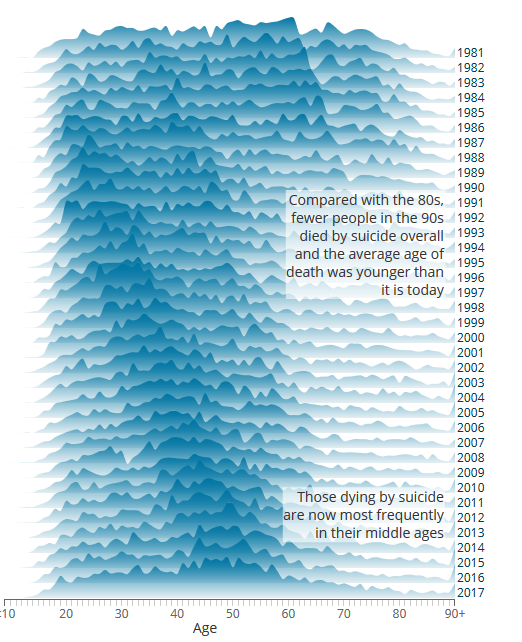

These data show a trend of increasing age of suicide - can this trend be found in data describing values and give an indication of what values maybe associated with suicide risk?

2) Data describing values and subjective well being for the UK from the ESS survey data.

### The first objective is to clean and combine these two data sets

In [1]:
# Module Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# import the ONS data
ons_df = pd.read_csv('./s_rates_by_year.csv')
ons_df.head()

,Age,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,<10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,10,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,11,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,12,0,0,0,0,0,0,2,0,0,2,1,0,0,1,0
4,13,2,1,2,2,3,3,3,1,1,4,2,0,0,3,0


In [3]:
# import the ESS data
ess_df = pd.read_csv('./ESS_survey_data.csv')
ess_df.head()

,cntry,cname,cedition,cproddat,cseqno,name,essround,edition,idno,dweight,...,iphlppl,ipsuces,ipstrgv,ipadvnt,ipbhprp,iprspot,iplylfr,impenv,imptrad,impfun
0,GB,ESS1-8e01,1,12.12.2018,161216,ESS1e06_6,1,6.6,100102,0.5256,...,2.0,2.0,2.0,4.0,4.0,2.0,2.0,2.0,2.0,4.0
1,GB,ESS1-8e01,1,12.12.2018,161217,ESS1e06_6,1,6.6,100104,1.0512,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,GB,ESS1-8e01,1,12.12.2018,161218,ESS1e06_6,1,6.6,100106,0.5256,...,1.0,5.0,2.0,5.0,2.0,5.0,1.0,1.0,2.0,4.0
3,GB,ESS1-8e01,1,12.12.2018,161219,ESS1e06_6,1,6.6,100110,1.0512,...,1.0,1.0,2.0,2.0,2.0,2.0,1.0,3.0,4.0,1.0
4,GB,ESS1-8e01,1,12.12.2018,161220,ESS1e06_6,1,6.6,100112,1.0512,...,2.0,3.0,3.0,4.0,4.0,2.0,1.0,3.0,4.0,2.0


### Label the years data was collected in the ESS data
The ESS data describes the year by the essround column values 1 -8 we need to convert these into the year the survey was taken. Information on the rounds can be found here:
https://www.europeansocialsurvey.org/data/round-index.html

In [4]:
ess_round_dict = {
    1: 2002,
    2: 2004,
    3: 2006,
    4: 2008,
    5: 2010,
    6: 2012,
    7: 2014,
    8: 2016,
}

In [5]:
# create a new column to hold the year
ess_df['year'] = ess_df['essround'].map(ess_round_dict)

### Remove the additional years that do not match from the ONS data

In [13]:
ons_reduced = ons_df.drop(['2003', '2005', '2007', '2009', '2011', '2013', '2015'], axis=1)

### ESS data cleanup
#### Remove columns that are not required for the analysis. The following information is provided by ESS:

The following variables are automatically included in the downloaded data by default:  
CNAME "Title of cumulative dataset"  
CEDITION "Edition of cumulative dataset"  
CPRODDAT "Production date of cumulative dataset"  
CSEQNO "Respondent's sequence number in cumulative dataset",  
NAME "Title of ESS dataset"  
ESSROUND "ESS round"  
EDITION "ESS edition"  
IDNO "Respondent's identification number"  
CNTRY "Country"  
DWEIGHT "Design weight"  
PSPWGHT "Post-stratification weight including design weight"  
PWEIGHT "Population size weight (must be combined with dweight)".  

The weight are described as:  

DESIGN WEIGHTS:  
The purpose of the design weights (DWEIGHT) is to correct for unequal probabilities for selection due to the sampling design used.  
In general design weights were computed for each country as follows.  

1. w = 1/(PROB1*...*PROBk)  is a  nx1 vector of weights ; k depends on the number of stages of the sampling design.

2. All weights were rescaled in a way that the sum of the final weights equals n, i.e. Rescaled weights = n*w/sum(w).

POST-STRATIFICATION WEIGHTS:  
The purpose of the post-stratification weights (PSPWGHT) is to reduce sampling error and non-response bias, using auxiliary information. The ESS post-stratification weights have been constructed using information about age, gender, education and region. The ESS post-stratification weights also adjust for unequal selection probabilities (design weights).
A raking procedure has been used in the production of the post-stratification weights.  

POPULATION WEIGHTS:  
The Population size weight (PWEIGHT) corrects for population size when combining two or more country's data, and is calculated as PWEIGHT=[Population aged 15 years and over]/[(Net sample in data file)*10 000]

#### Remove missing data values or replace them

The following missing values have been assigned:  
6, 66 etc. = Not applicable  
7, 77 etc. = Refusal  
8, 88 etc. = Don't know  
9, 99 etc.  = No answer, i.e. Missing data not elsewhere explained  
.  =  Variable not relevant, not deposited, or for other reason omitted from the data file by the archive.  


In [6]:
# How many unique values does each column have?
ess_df.nunique()

cntry           1
cname           1
cedition        1
cproddat        1
cseqno      17626
name            8
essround        8
edition         8
idno        15555
dweight       518
pspwght      4050
pweight         8
ppltrst        13
pplfair        13
pplhlp         13
stflife        13
happy          13
sclmeet         9
aesfdrk         6
dscrgrp         5
gndr            3
agea           86
hincfel         7
ipcrtiv         9
imprich         9
ipeqopt         9
ipshabt         9
impsafe         9
impdiff         9
ipfrule         9
ipudrst         9
ipmodst         9
ipgdtim         9
impfree         9
iphlppl         9
ipsuces         9
ipstrgv         9
ipadvnt         9
ipbhprp         9
iprspot         9
iplylfr         9
impenv          9
imptrad         9
impfun          9
year            8
dtype: int64

In [18]:
# Drop the excess columns
ess_reduced = ess_df.drop(
    ['cntry', 'cname', 'cedition', 'cproddat', 'cseqno', 'essround', 'edition', 'idno', 'name'], axis=1)
# note leave the indivdual ids in

In [19]:
# Currently unsure about the use of the weightings so they will be removed for this first analysis
ess_reduced = ess_reduced.drop(['dweight', 'pspwght', 'pweight'], axis=1)

In [20]:
ess_reduced.nunique()

ppltrst    13
pplfair    13
pplhlp     13
stflife    13
happy      13
sclmeet     9
aesfdrk     6
dscrgrp     5
gndr        3
agea       86
hincfel     7
ipcrtiv     9
imprich     9
ipeqopt     9
ipshabt     9
impsafe     9
impdiff     9
ipfrule     9
ipudrst     9
ipmodst     9
ipgdtim     9
impfree     9
iphlppl     9
ipsuces     9
ipstrgv     9
ipadvnt     9
ipbhprp     9
iprspot     9
iplylfr     9
impenv      9
imptrad     9
impfun      9
year        8
dtype: int64

#### Rename some of the columns to make them more readable
The majority of the remaining columns relate to survey questions
Other are features of the population surveyed - lets rename some of the features to make the columns meaning easier to understand

In [26]:
# Gender is not in the ONS data set so it can be dropped
ess_reduced.drop(['gndr'], inplace=True, axis=1)

In [29]:
# Rename agea as age
ess_reduced.rename(columns={'agea': 'age'}, inplace=True)

#### What values do we have in the columns with 13 values?

In [21]:
ess_reduced['ppltrst'].value_counts()

5     3922
7     3201
6     2218
8     2136
4     1877
3     1652
2      862
0      645
1      425
9      386
10     258
88      43
77       1
Name: ppltrst, dtype: int64

In [22]:
# for these columns we will replace the codes with NaN to indicate null
replace_dict = {66: np.nan, 77: np.nan, 88: np.nan, 99: np.nan,}
v13 = ['ppltrst', 'pplfair', 'pplhlp', 'stflife', 'happy' ]
for col in v13:
    ess_reduced[col] = ess_reduced[col].replace(replace_dict)

#### What values do we have in the columns with 9 values?

In [25]:
ess_reduced['sclmeet'].value_counts()

6     5449
5     3764
7     2596
4     2487
3     1608
2     1335
1      372
88      13
77       2
Name: sclmeet, dtype: int64

In [31]:
# clean the 9 value columns of the marker values
v9 = ['sclmeet',
      'ipcrtiv', 'imprich', 'ipeqopt',
      'ipshabt', 'impsafe', 'impdiff', 'ipfrule', 'ipudrst', 'ipmodst',
      'ipgdtim', 'impfree', 'iphlppl', 'ipsuces', 'ipstrgv', 'ipadvnt',
      'ipbhprp', 'iprspot', 'iplylfr', 'impenv', 'imptrad', 'impfun']
for col in v9:
    ess_reduced[col] = ess_reduced[col].replace(replace_dict)

In [32]:
ess_reduced.nunique()

ppltrst    11
pplfair    11
pplhlp     11
stflife    11
happy      11
sclmeet     7
aesfdrk     6
dscrgrp     5
age        86
hincfel     7
ipcrtiv     9
imprich     9
ipeqopt     9
ipshabt     9
impsafe     9
impdiff     9
ipfrule     9
ipudrst     9
ipmodst     9
ipgdtim     9
impfree     9
iphlppl     9
ipsuces     9
ipstrgv     9
ipadvnt     9
ipbhprp     9
iprspot     9
iplylfr     9
impenv      9
imptrad     9
impfun      9
year        8
dtype: int64

#### The remaining columns
Check the values in the remaining columns that we have not processed yet

In [34]:
ess_reduced['aesfdrk'].value_counts()

2    8135
1    3989
3    3802
4    1554
8     143
7       3
Name: aesfdrk, dtype: int64

In [35]:
ess_reduced['dscrgrp'].value_counts()

2    15283
1     2233
8       98
7       11
9        1
Name: dscrgrp, dtype: int64

In [44]:
ess_reduced['age'].value_counts()

40     340
36     331
41     326
35     322
44     316
37     314
42     307
61     306
39     303
48     297
60     295
64     295
57     294
49     293
38     292
45     290
67     288
32     287
30     286
59     286
47     286
62     284
43     282
66     282
54     281
46     280
52     279
33     278
56     276
34     273
      ... 
23     173
76     173
22     172
78     165
81     163
16     162
82     153
80     151
19     151
17     150
79     149
83     145
999    140
84      95
15      91
86      80
85      79
87      72
88      52
89      41
90      38
91      28
92      19
93      12
94       8
95       4
98       2
97       1
96       1
123      1
Name: age, Length: 86, dtype: int64

In [45]:
# remove rows with age 999
ess_reduced = ess_reduced[ess_reduced['age']<999]
# drop 123

In [66]:
# output a csv file
ess_reduced.to_csv('./ESS_clean_with_NaN.csv')

## Group the ESS data by year and age to match the ONS data

In [69]:
ppltrst = ess_reduced[['ppltrst', 'year', 'age']].groupby(['year', 'age']).mean()
ppltrst

ppltrst
year age          
2002 15   4.444444
     16   5.041667
     17   5.105263
     18   5.350000
     19   4.954545
     20   5.120000
     21   4.476190
     22   4.933333
     23   5.250000
     24   4.916667
     25   4.238095
     26   4.500000
     27   4.086957
     28   3.906250
     29   4.638889
     30   5.533333
     31   4.939394
     32   4.714286
     33   4.500000
     34   5.058824
     35   4.485714
     36   5.228070
     37   5.352941
     38   4.971429
     39   5.500000
     40   4.962264
     41   4.888889
     42   5.384615
     43   5.178571
     44   5.083333
...            ...
2016 65   5.656250
     66   5.857143
     67   5.000000
     68   5.432432
     69   5.926829
     70   5.953488
     71   4.846154
     72   5.000000
     73   5.321429
     74   5.642857
     75   5.600000
     76   4.277778
     77   5.451613
     78   6.142857
     79   5.636364
     80   4.692308
     81   5.647059
     82   5.800000
     83   4.933333
     84   5.769231
     85   5.333333
     86   5.769231
     87   4.600000
     88   6.625000
     89   4.500000
     90   6.800000
     91   3.666667
     92   4.500000
     93   7.500000
     94   5.000000

[643 rows x 1 columns]

In [61]:
def agg_years_age(df, col):
    # get the years in the dataframe
    years = df['year'].unique()
    # get the ages in the dataframe
    ages = df['age'].unique()
    df_sel = df[[col, 'year', 'age']]
    for year i years:
        df_sel = df_sel[def_sel['years']==year]
        for age in ages:
    
    
    

AttributeError: 'DataFrame' object has no attribute 'year'

In [68]:
years = ess_reduced['year'].unique()
years

array([2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016], dtype=int64)